In [4]:
import os

# Find the latest version of Spark 3.x and set it as the Spark version
# For example:
# spark_version = 'spark-3.4.0'
spark_version = 'spark-3.4.0'
os.environ['SPARK_VERSION'] = spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install findspark
!pip install pyspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("SparkSetupTest") \
    .getOrCreate()

# Test Spark
print("Spark version:", spark.version)


# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

df_spark = spark.read.csv("diabetes_012_health_indicators_BRFSS2015.csv", sep=",", header=True)
df_spark.show()


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Spark version: 3.4.0
+------------+------+--------+---------+----+----

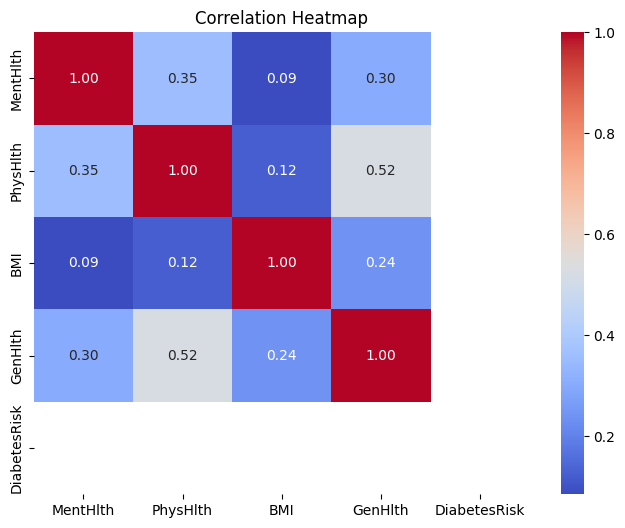

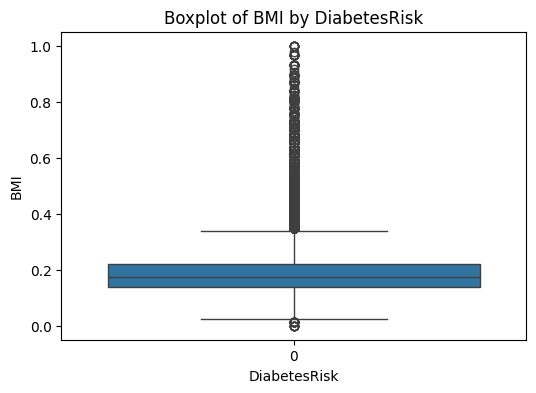

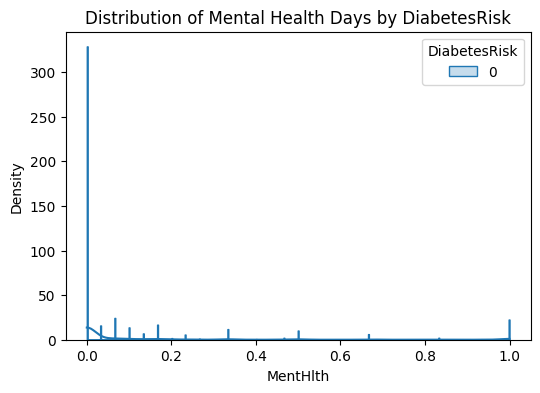

<ipython-input-9-369ba390ec14>:56: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='BMI', y='MentHlth', palette='viridis')


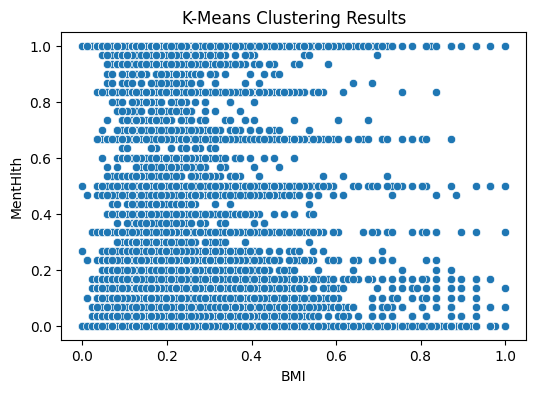

In [9]:
# Step 1: Setup and Tools

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
df_spark = df_spark.select('MentHlth', 'PhysHlth', 'BMI', 'GenHlth', 'Diabetes_012')



# Convert Spark DataFrame to Pandas DataFrame
data = df_spark.toPandas()
selected_columns = ['MentHlth', 'PhysHlth', 'BMI', 'GenHlth', 'Diabetes_012']
df = data[selected_columns]

# Handle missing values (though no missing values were indicated earlier)
df = df.dropna()

# Normalize continuous variables
scaler = MinMaxScaler()
df[['MentHlth', 'PhysHlth', 'BMI']] = scaler.fit_transform(df[['MentHlth', 'PhysHlth', 'BMI']])

# Encode the target variable
df['DiabetesRisk'] = df['Diabetes_012'].apply(lambda x: 1 if x == 2 else 0)
df = df.drop(columns=['Diabetes_012'])

# Step 3: EDA

# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot: BMI vs DiabetesRisk
plt.figure(figsize=(6, 4))
sns.boxplot(x='DiabetesRisk', y='BMI', data=df)
plt.title("Boxplot of BMI by DiabetesRisk")
plt.show()

# Distribution of Mental Health Days by DiabetesRisk
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='MentHlth', hue='DiabetesRisk', kde=True, element="step", stat="density")
plt.title("Distribution of Mental Health Days by DiabetesRisk")
plt.show()

# Plot Clustering Results
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='BMI', y='MentHlth', palette='viridis')
plt.title("K-Means Clustering Results")
plt.show()

#data = pd.read_csv(r"C:\Users\jt4ha\Dark Sky Data Dropbox\JT Turner\Certifications\diabetes_012_health_indicators_BRFSS2015.csv")

